<a href="https://colab.research.google.com/github/sjoerdteunisse/ML2-Workshop-project/blob/main/Countries_of_the_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Countries of the world ML project

## Import dependecies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load data

In [2]:
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/Countries-Of-The-World-data/countries%20of%20the%20world.csv

--2020-09-22 12:55:20--  https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/Countries-Of-The-World-data/countries%20of%20the%20world.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38303 (37K) [text/plain]
Saving to: ‘countries of the world.csv’

countries of the wo 100%[===================>]  37.41K  --.-KB/s    in 0.01s   

2020-09-22 12:55:20 (2.63 MB/s) - ‘countries of the world.csv’ saved [38303/38303]



In [3]:
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2015.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2016.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2017.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2018.csv
!wget https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2019.csv

--2020-09-22 12:55:20--  https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16557 (16K) [text/plain]
Saving to: ‘WH-2015.csv’

WH-2015.csv         100%[===================>]  16.17K  --.-KB/s    in 0.01s   

2020-09-22 12:55:20 (1.33 MB/s) - ‘WH-2015.csv’ saved [16557/16557]

--2020-09-22 12:55:21--  https://raw.githubusercontent.com/sjoerdteunisse/ML2-Workshop-project/main/World-Happiness-data/WH-2016.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response..

In [4]:
raw_cofw_df = pd.read_csv("/content/countries of the world.csv", decimal=',')

In [5]:
raw_cofw_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [6]:
raw_cofw_df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [7]:
raw_cofw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [8]:
raw_data = raw_cofw_df.iloc[:,:]

In [9]:
raw_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Print all numerical data


In [10]:
numerical_var = raw_data.select_dtypes(include=[np.number])
numerical_var.dtypes

Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

## Print all categorical data


In [11]:
categorical_var = raw_data.select_dtypes(exclude=[np.number])
categorical_var.dtypes

Country    object
Region     object
dtype: object

## Check unusable data values

In [12]:
print(pd.isnull(raw_data).sum())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


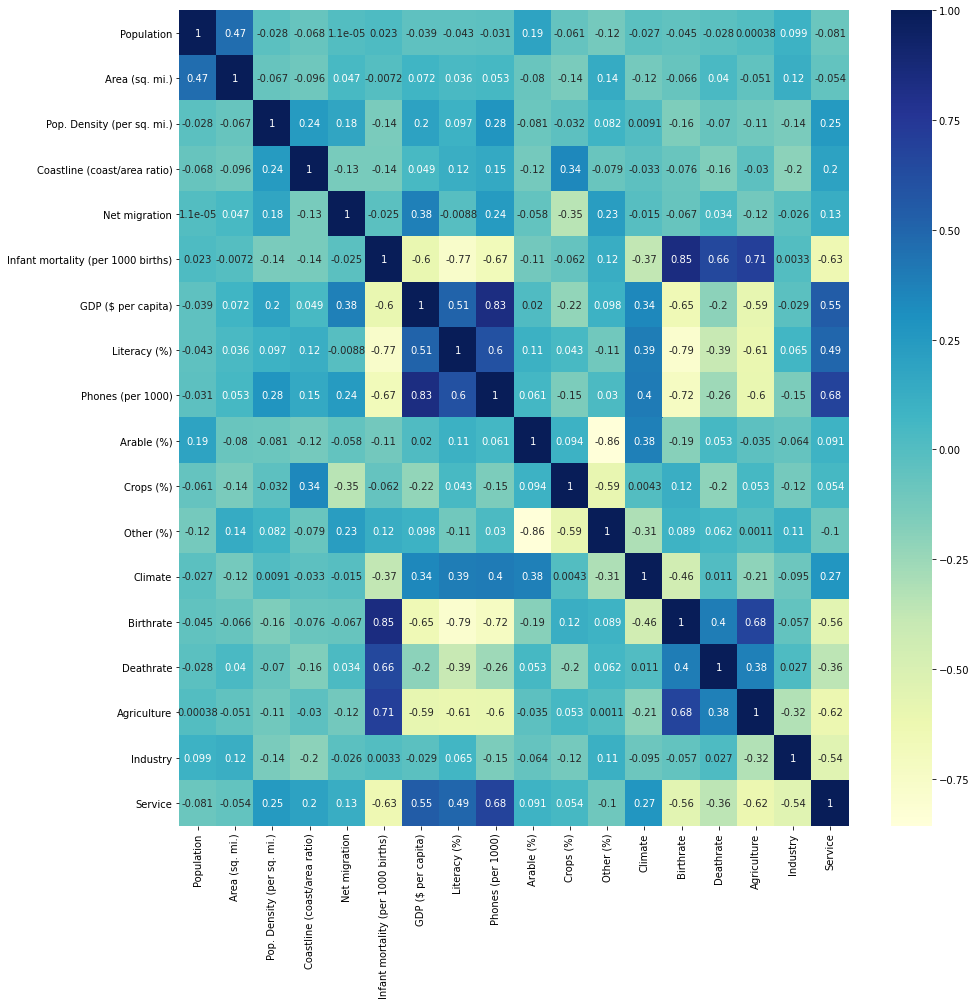

In [13]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(raw_data.corr(), cmap="YlGnBu", annot=True);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


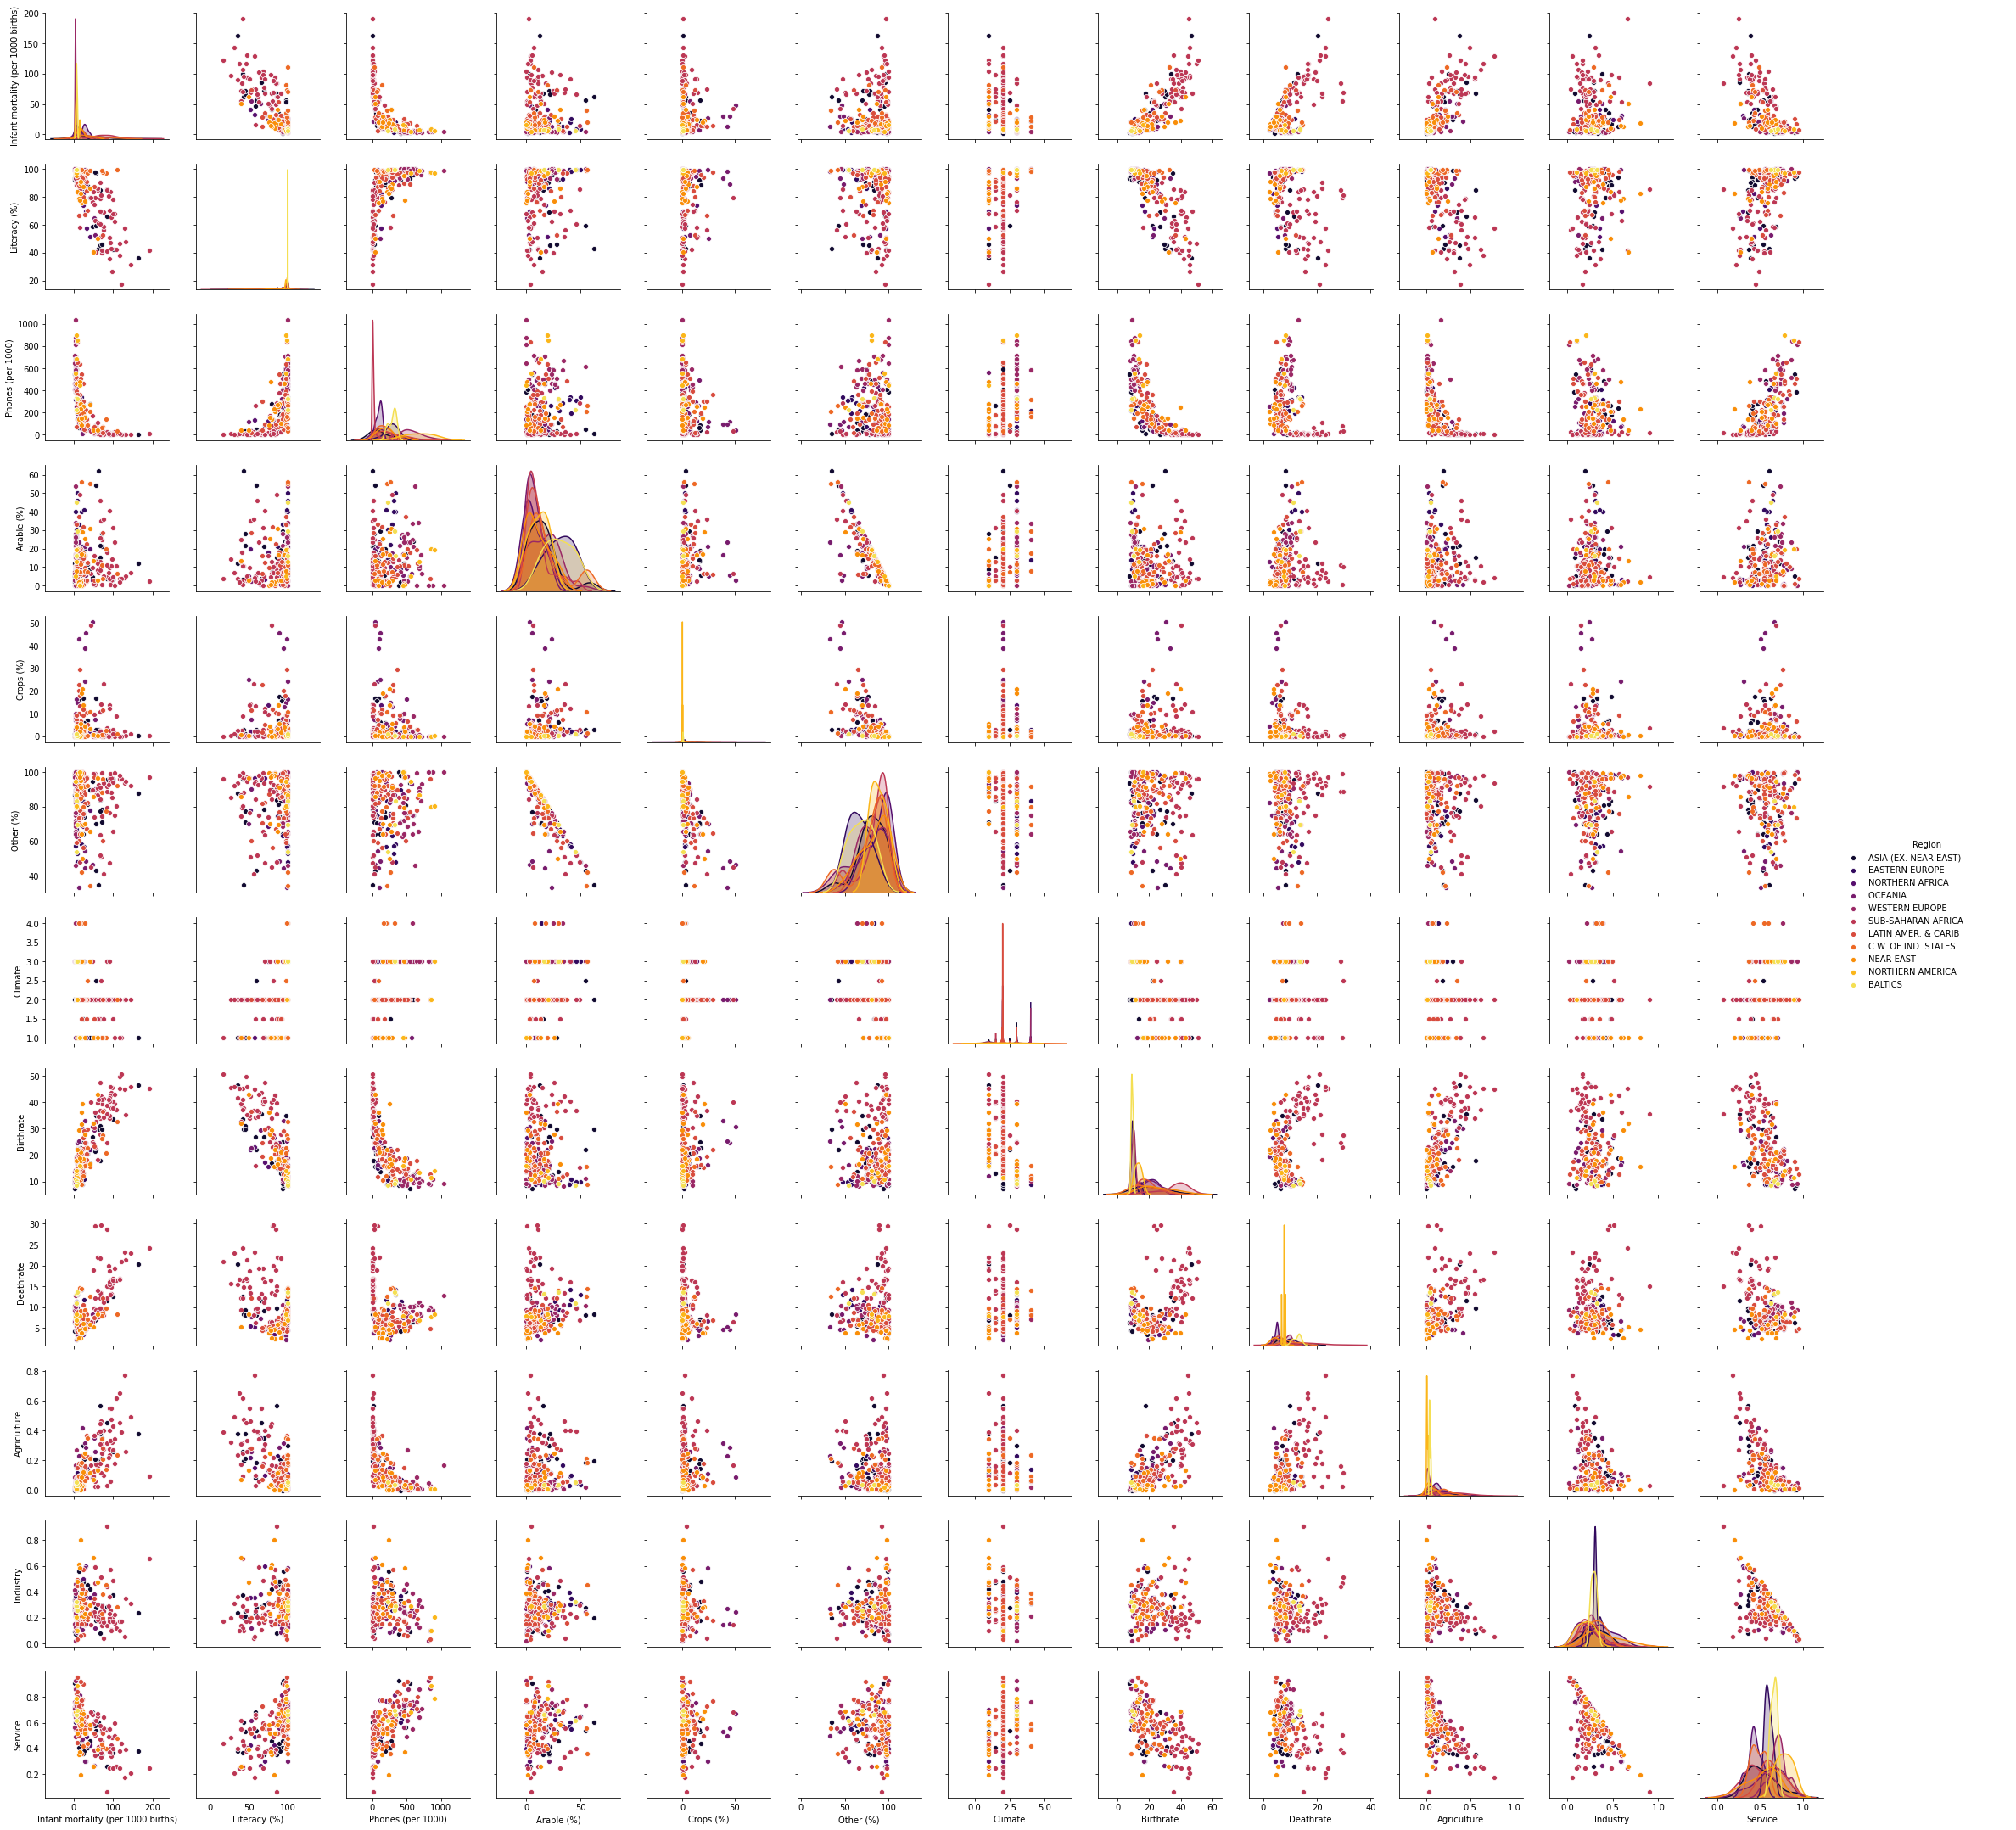

In [14]:
x = raw_cofw_df.loc[:,["Region", "Infant mortality (per 1000 births)", "Literacy (%)", "Phones (per 1000)", "Arable (%)", "Crops (%)", "Other (%)", "Climate", "Birthrate", "Deathrate", "Agriculture", "Industry", "Service"]]
sns.pairplot(x,hue="Region",palette="inferno")

In [15]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


data = dict(type='choropleth',
locations = raw_data.Country,
locationmode = 'country names', z = raw_data.Population,
text = raw_data.Country, colorbar = {'title':'Population'},
colorscale = 'Blackbody', reversescale = True)
layout = dict(title='Population per country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [16]:
len(raw_data["Region"].unique())

11

In [17]:
#features = ["Population", "Area (sq. mi.)", "Pop. Density (per sq. mi.)", "Coastline (coast/area ratio)", "Net migration", "Infant mortality (per 1000 births)", "Literacy (%)", "Phones (per 1000)", "Arable (%)", "Crops (%)", "Other (%)", "Climate", "Birthrate", "Deathrate", "Agriculture", "Industry", "Service"]
features = ["Infant mortality (per 1000 births)", "Birthrate", "Deathrate", "Agriculture", "Service", "Industry", "Literacy (%)"]

prediction_feature = ["Region"]

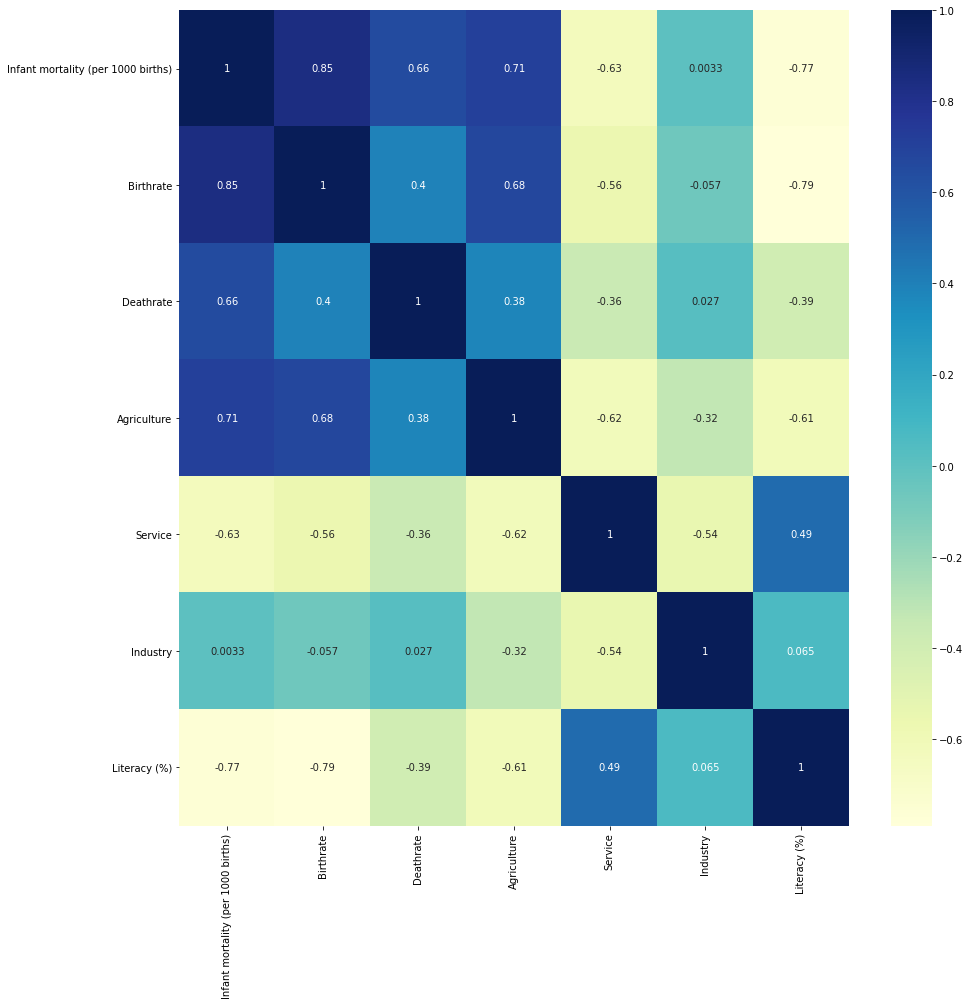

In [18]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(raw_data[features].corr(), cmap="YlGnBu", annot=True);

In [113]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

le = LabelEncoder()
Y_train = le.fit_transform(raw_data["Region"].unique())
dummy_y = to_categorical(Y_train).astype(float)

print(raw_data["Region"].values)

['ASIA (EX. NEAR EAST)         ' 'EASTERN EUROPE                     '
 'NORTHERN AFRICA                    '
 'SUB-SAHARAN AFRICA                 ' 'LATIN AMER. & CARIB    '
 'LATIN AMER. & CARIB    ' 'LATIN AMER. & CARIB    '
 'C.W. OF IND. STATES ' 'LATIN AMER. & CARIB    '
 'OCEANIA                            '
 'WESTERN EUROPE                     ' 'C.W. OF IND. STATES '
 'LATIN AMER. & CARIB    ' 'NEAR EAST                          '
 'ASIA (EX. NEAR EAST)         ' 'LATIN AMER. & CARIB    '
 'C.W. OF IND. STATES ' 'WESTERN EUROPE                     '
 'LATIN AMER. & CARIB    ' 'SUB-SAHARAN AFRICA                 '
 'NORTHERN AMERICA                   ' 'ASIA (EX. NEAR EAST)         '
 'LATIN AMER. & CARIB    ' 'SUB-SAHARAN AFRICA                 '
 'LATIN AMER. & CARIB    ' 'LATIN AMER. & CARIB    '
 'ASIA (EX. NEAR EAST)         ' 'EASTERN EUROPE                     '
 'SUB-SAHARAN AFRICA                 ' 'ASIA (EX. NEAR EAST)         '
 'SUB-SAHARAN AFRICA                 ' 

In [111]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout

model = Sequential()
raw_data.dropna(subset=features, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(raw_data[features], dummy_y, test_size=0.3, random_state=41)

print(y_train)

model.add(Dense(7,  activation="relu"))

model.add(Dense(84, activation="sigmoid"))
model.add(Dense(84, activation="relu"))

model.add(Dense(84, activation="sigmoid"))
model.add(Dense(84, activation="relu"))

model.add(Dense(11, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


hm = model.fit(X_train, y_train, epochs= 1000, validation_data=(X_test, y_test))

ValueError: ignored

**Decision Tree**

In [107]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#X = features
X = ["Infant mortality (per 1000 births)", "Birthrate", "Deathrate", "Agriculture", "Service", "Industry", "Literacy (%)"]
y = prediction_feature
X_train, X_test, y_train, y_test = train_test_split(raw_data[features], dummy_y, test_size=0.3, random_state=41) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=12)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.576271186440678


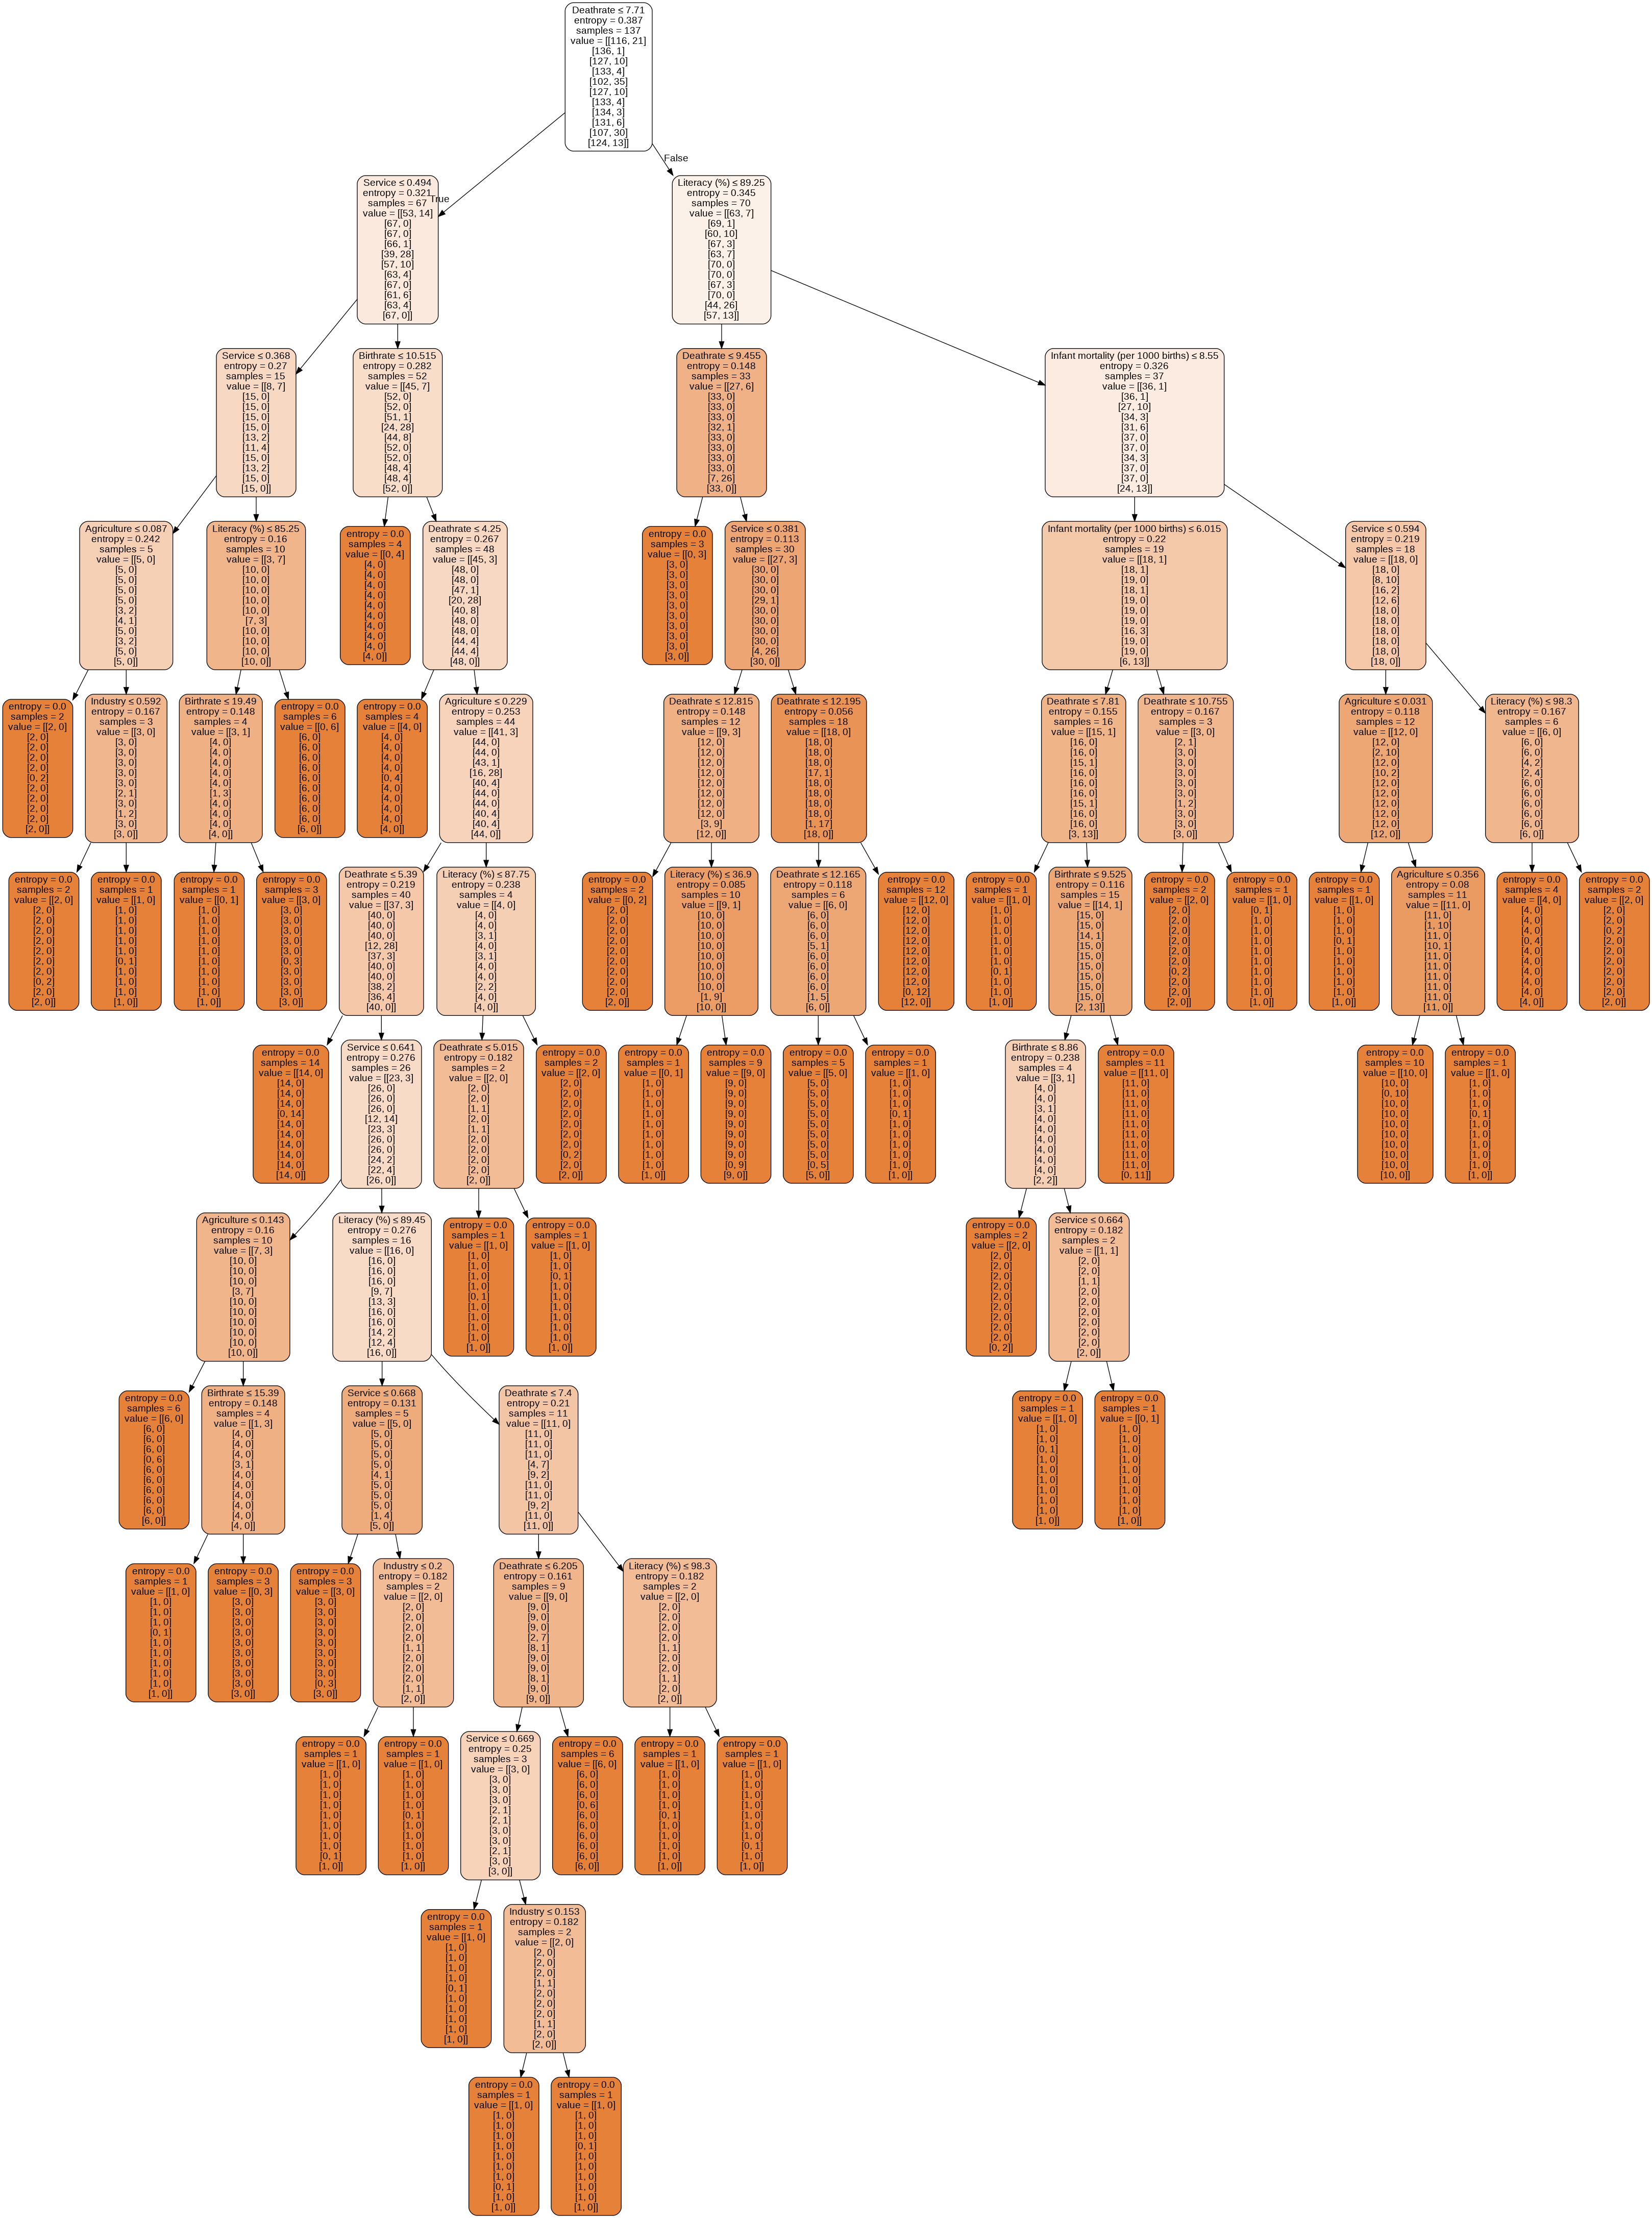

In [96]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

**Random Forest**

In [105]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100)
X = ["Infant mortality (per 1000 births)", "Birthrate", "Deathrate", "Agriculture", "Service", "Industry", "Literacy (%)"]
y = prediction_feature
X_train, X_test, y_train, y_test = train_test_split(raw_data[features], raw_data["Region"], test_size=0.3, random_state=41) # 70% training and 30% test

forest.fit(X_train, y_train)

y_pred=forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.6779661016949152
